#### Internship Predictor 

In [2]:
import pandas as pd
df = pd.read_csv("placementdata.csv")
print(df)

      StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0             1   7.5            1         1                         1   
1             2   8.9            0         3                         2   
2             3   7.3            1         2                         2   
3             4   7.5            1         1                         2   
4             5   8.3            1         2                         2   
...         ...   ...          ...       ...                       ...   
9995       9996   7.5            1         1                         2   
9996       9997   7.4            0         1                         0   
9997       9998   8.4            1         3                         0   
9998       9999   8.9            0         3                         2   
9999      10000   8.4            0         1                         1   

      AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                    65               4.

In [4]:
df.head(10)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
5,6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced
6,7,7.7,1,1,1,76,4.0,No,No,62,65,NotPlaced
7,8,7.7,2,1,0,85,3.5,Yes,Yes,59,72,NotPlaced
8,9,6.5,1,1,0,84,3.9,No,Yes,75,71,NotPlaced
9,10,7.8,1,3,2,79,4.4,Yes,Yes,85,86,Placed


In [10]:
df.shape

(10000, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [14]:
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [18]:
df.nunique()

StudentID                    10000
CGPA                            27
Internships                      3
Projects                         4
Workshops/Certifications         4
AptitudeTestScore               31
SoftSkillsRating                19
ExtracurricularActivities        2
PlacementTraining                2
SSC_Marks                       36
HSC_Marks                       32
PlacementStatus                  2
dtype: int64

In [20]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("placementdata.csv")

# Drop ID column
df.drop("StudentID", axis=1, inplace=True)

# Encode categorical features
le = LabelEncoder()
df['ExtracurricularActivities'] = le.fit_transform(df['ExtracurricularActivities'])  # Yes=1, No=0
df['PlacementTraining'] = le.fit_transform(df['PlacementTraining'])  # Yes=1, No=0
df['PlacementStatus'] = le.fit_transform(df['PlacementStatus'])  # Placed=1, NotPlaced=0

# Split features and target
X = df.drop('PlacementStatus', axis=1)
y = df['PlacementStatus']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# Model 1: Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)

# ------------------------------
# Model 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

# ------------------------------
# Model 3: XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)

# ------------------------------
# Print Results
print("Logistic Regression Accuracy:", round(log_acc * 100, 2), "%")
print("Random Forest Accuracy:", round(rf_acc * 100, 2), "%")
print("XGBoost Accuracy:", round(xgb_acc * 100, 2), "%")

print("\nBest model is:", 
      "Logistic Regression" if log_acc > max(rf_acc, xgb_acc) else 
      "Random Forest" if rf_acc > xgb_acc else "XGBoost")

# Classification Report for Best Model
best_preds = max([(log_model, log_preds, log_acc),
                  (rf_model, rf_preds, rf_acc),
                  (xgb_model, xgb_preds, xgb_acc)], key=lambda x: x[2])[1]

print("\nClassification Report:\n", classification_report(y_test, best_preds))


Logistic Regression Accuracy: 78.9 %
Random Forest Accuracy: 78.15 %
XGBoost Accuracy: 77.85 %

Best model is: Logistic Regression

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1172
           1       0.74      0.76      0.75       828

    accuracy                           0.79      2000
   macro avg       0.78      0.79      0.78      2000
weighted avg       0.79      0.79      0.79      2000



In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Random search of parameters
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                      n_iter=20, cv=3, verbose=1, n_jobs=-1,
                                      scoring='accuracy', random_state=42)

# Fit the search to the data
rf_random_search.fit(X_train, y_train)

# Best estimator
best_rf = rf_random_search.best_estimator_

# Predict and evaluate
y_pred_rf = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Tuned Random Forest Accuracy:", round(rf_accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Tuned Random Forest Accuracy: 79.1 %

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1172
           1       0.76      0.73      0.74       828

    accuracy                           0.79      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.79      0.79      2000



In [8]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb,
                                n_iter=15, cv=3, verbose=1, n_jobs=-1,
                                scoring='accuracy', random_state=42)

xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_

# Predict and evaluate
y_pred_xgb = best_xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print("Tuned XGBoost Accuracy:", round(xgb_accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Tuned XGBoost Accuracy: 79.7 %

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1172
           1       0.76      0.75      0.75       828

    accuracy                           0.80      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.80      0.80      2000



✅ Model Comparison:
Logistic Regression Accuracy: 78.90%
Random Forest Accuracy:       78.15%
XGBoost Accuracy:             77.85%

🏆 Best Model: Logistic Regression

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1172
           1       0.74      0.76      0.75       828

    accuracy                           0.79      2000
   macro avg       0.78      0.79      0.78      2000
weighted avg       0.79      0.79      0.79      2000


🔷 Confusion Matrix:


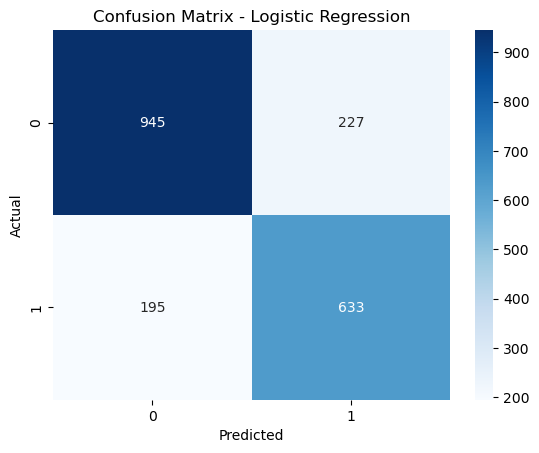

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming these are your tuned models:
# - best_log_model (Logistic Regression)
# - best_rf_model (Random Forest)
# - best_xgb_model (XGBoost)
# And your train-test split:
# - X_test, y_test

# Get predictions
log_preds = log_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)


# Calculate accuracy
log_acc = accuracy_score(y_test, log_preds)
rf_acc = accuracy_score(y_test, rf_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)

# Compare
print("✅ Model Comparison:")
print(f"Logistic Regression Accuracy: {log_acc * 100:.2f}%")
print(f"Random Forest Accuracy:       {rf_acc * 100:.2f}%")
print(f"XGBoost Accuracy:             {xgb_acc * 100:.2f}%")

# Identify best model
model_scores = {
    'Logistic Regression': log_acc,
    'Random Forest': rf_acc,
    'XGBoost': xgb_acc
}
best_model_name = max(model_scores, key=model_scores.get)
best_pred = {
    'Logistic Regression': log_preds,
    'Random Forest': rf_preds,
    'XGBoost': xgb_preds
}[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, best_pred))

# Confusion Matrix
print("\n🔷 Confusion Matrix:")
cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [20]:
import pickle

# Save the trained model and features used
model_data = {
    'model': xgb_model,               # 👈 use your trained model name here
    'features': X.columns.tolist()   # this is your feature list
}

with open('best_placement_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("✅ Model saved as best_placement_model.pkl")


✅ Model saved as best_placement_model.pkl
